# Gradient boosting with a Learning Rate
In this notebook, I am going to implement a  gradient boosting method from scratch using decision trees. There is more than one way how gradient boosting can be implemented. The selected approach is using the same approach as used in sklearn where they decided to use mean calculation as the base predictor.

In [15]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

First, lets generate some data following the sine wave with some added noise. Then lets split it into train and test sets.

In [42]:
xdim =np.pi *4
ydim =1.5
size = 400
#X = np.random.rand(500, 1) - 0.5
# define functions
#X = np.arange(-xlim, xlim, 0.1)
X = np.linspace(-xdim, xdim, size).reshape(-1,1)
#X[:,0] is used to select a right dimension
#0.1 * np.random.randn(size) is used for adding noise
y = np.sin(X[:,0]) + 0.1 * np.random.randn(size)
x_train ,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [43]:
len(x_train),len(x_test)

(320, 80)

In [44]:
def plot_predictions(x_train, y_train, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    plt.plot(x_train, y_train, data_style, label=data_label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

Lets plot our train set.

No handles with labels found to put in legend.


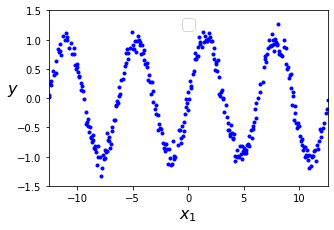

In [45]:
plt.figure(figsize=(11,11))
plt.subplot(321)
plot_predictions( x_train, y_train, axes=[-xdim, xdim, -ydim, ydim], label="all")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

Now our test set.

No handles with labels found to put in legend.


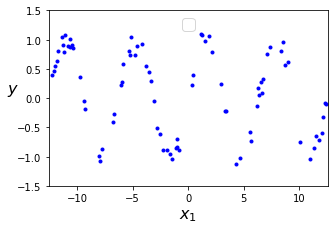

In [46]:
plt.figure(figsize=(11,11))
plt.subplot(321)
plot_predictions( x_test, y_test, axes=[-xdim, xdim, -ydim, ydim], label="all")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

Now lets create and run our gradient boosting trees ensemle.
The problem is going to be tackled in the following way:
1. First, I am going to calculate the mean and use it as a base predictor.
2. Then I am going to loop for specified amount of times, each time creating a new decision tree, which is going to be used as an additional predictor.
3. After creating a new predictor, I am going to train it using sine wave dataset. Instead of using the actual values as a target, I am going to train the predictor on a difference between target and before trained predictors ensemled prediction value. For the first loop the ensembled value is equals to mean.
4. Then, after training a new predictor, I am going to predict a target values with it and will add it to trained predictors values total sum.
5. Finally, I am going to append the trained predictor to the predictors list saving it for the future use.

In [88]:

predict = []
lr = 0.1
n_estimators = 200

avg = y_train.mean()
y_pred = np.ones(len(y_train)) * avg

trees = []

for i in range(n_estimators):
    tree_regs = DecisionTreeRegressor(max_depth=2, random_state=42)
    err = y_train - y_pred
    tree_regs.fit(x_train, err)
    predict = tree_regs.predict(x_train)
    y_pred = y_pred +predict*lr
    trees.append(tree_regs)

# Predictions

In [89]:
y_pred = sum(tree.predict(x_test) for tree in trees)*lr + avg
result = 100- sum(y_test - y_pred)/len(x_test)
result

99.97400833770394

Plot of the final prediction.

In [90]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    size = len(X)
    x1 = np.linspace(axes[0], axes[1], size)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    i = 1
    y_pred = np.ones(len(y)) * avg
    for regressor in regressors:
        y_pred = y_pred +regressor.predict(x1.reshape(-1, 1))*lr
    plt.plot(x1, y_pred, linewidth=2, label=label)
    plt.axis(axes)

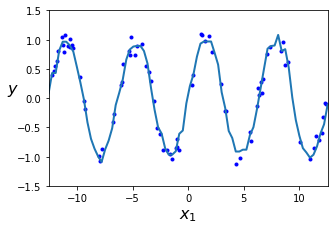

In [91]:
plt.figure(figsize=(11,11))
plt.subplot(321)
plot_predictions(trees, x_test, y_test, axes=[-xdim, xdim, -ydim, ydim])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

Plot of ensembling all of the trees together.

In [94]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    size = len(X)
    x1 = np.linspace(axes[0], axes[1], size)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    i = 1
    y_pred = np.ones(len(y)) * avg
    plt.plot(x1, y_pred, linewidth=2, label=label)
    for regressor in regressors:
        y_pred = y_pred +regressor.predict(x1.reshape(-1, 1))*lr
        plt.plot(x1, y_pred, linewidth=2, label=label)
    plt.axis(axes)

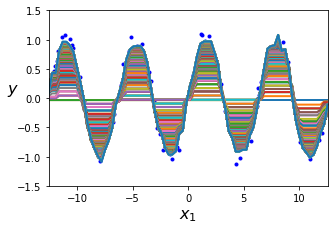

In [95]:
plt.figure(figsize=(11,11))
plt.subplot(321)
plot_predictions(trees, x_test, y_test, axes=[-xdim, xdim, -ydim, ydim])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()